# <center> Heart disease </center>
<center>A report by Jamie Wallis </center>
<center>Originally published: 09/03/2020 </center>


## __Introduction to the problem__

Heart disease is a globally prevalent problem[$^1$](https://www.who.int/health-topics/cardiovascular-diseases). In the USA, heart disease is the leading cause of death for both men and women, accouning for approximately 1 in 4 deaths[$^2$](https://www.cdc.gov/heartdisease/facts.htm). Similarly, in the UK, heart and circulatory diseases (cardiovascular disease, CVD) cause 27% of all deaths[$^3$](https://www.bhf.org.uk/what-we-do/our-research/heart-statistics). CVD's have been associated with a total healthcare cost of 9 billion GBP (11.5 billion USD) in the UK each year, and a total cost to the UK economy of 19 billion GBP (24.3 billion USD)[$^3$](https://www.bhf.org.uk/what-we-do/our-research/heart-statistics). In recent decades there has been an increase in major risk factors, such as obesity and diabetes[$^4$](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3377116/pdf/emmm0003-0697.pdf). Due to the rising life expectancy of populations the incidences of heart failure have also been increasing[$^4$](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3377116/pdf/emmm0003-0697.pdf). Risk factors for coronary heart disease and heart failure are also closely linked with dementia risk, in particular a meta-analysis of the literature found that coronary heart disease and heart failure may well increase the risk of dimentia[$^5$](https://www.sciencedirect.com/science/article/abs/pii/S1552526018300268). Machine learning provides an approach for a more sophisticated, improved, automatic method of disease diagnostics[$^6$](https://www.annualreviews.org/doi/abs/10.1146/annurev.bioeng.8.061505.095802). Developing a method with high accuracy that would enable a faster patient diagnosis would enable faster treatment of the disease. Here I compare several common machine learning algorithms for their ability to classify whether a patient has heart disease or not given 13 patient-level features.

## __Introduction to the dataset__

This report makes use of a heart disease database found on Kaggle[$^7$](https://www.kaggle.com/ronitf/heart-disease-uci) containing 303 examples. It is an extract of a dataset from the UCL Machine Learning Repository[$^8$](https://archive.ics.uci.edu/ml/datasets/heart+Disease). The original data set contained 75 patient-level features, however all published experiments refer to only a subset of 13 of them[$^9$](https://archive.ics.uci.edu/ml/datasets/heart+Disease). This subset include:
1. Age
2. Indicator of sex (1 = 'male', 0 = 'female')
3. Cheast pain type
        a. Typical angina
        b. Atypical angina
        c. Non-anginal pain
        d. asymptomatic
4. Resting blood pressure (mmHg measured on admission to the hospital)
5. Concentration of cholesterol in serum (mg/dL)
6. Indicator of fasting blood sugar level (1 = '>120mg/mL', 0 = <= '120mg/mL')
7. Resting electrocardiographic results
        a. Normal
        b. Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        c. Showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. Maximum heart rate achieved upon examination
9. Indicator of exercise induced angina (1 = 'yes', 0 = 'no')
10. ST depression induced by exercise relative to rest 
11. Slope of the peak exercise ST segment 
        a. Downsloping
        b. Flat
        c. Upsloping
12. Number of major vessels (0-3) colored by flourosopy
13. Thallium
        a. Fixed Defect
        b. Normal
        c. Reversable Defect

The diagnosis (target) value is given as 0 = '< 50% vessel diameter narrowing', 1 = '>50% vessel diameter narrowing', where 0 represents a diseased patient and 1 represents a non-diseased patient.

In [1]:
file_path = 'C:/Users/Jamie/Downloads/heart-disease-uci/heart.csv'

In [5]:
import pandas as pd
df = pd.read_csv(file_path)
df.columns = ['Age'
             ,'Sex'
             ,'ChestPain'
             ,'RestingBloodPressure'
             ,'SerumCholestoral'
             ,'FastBloodSugarOver120'
             ,'RestECG'
             ,'MaxHR'
             ,'ExerciseInducedAngina'
             ,'Oldpeak'
             ,'PeakSlope'
             ,'NumOfVessels'
             ,'Thallium'
             ,'ClassLabel']
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,SerumCholestoral,FastBloodSugarOver120,RestECG,MaxHR,ExerciseInducedAngina,Oldpeak,PeakSlope,NumOfVessels,Thallium,ClassLabel
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


All features are encoded, and so are numerical. Therefore, lets look to check that realistic numbers are entered for each feature

In [6]:
df.describe()

,Age,Sex,ChestPain,RestingBloodPressure,SerumCholestoral,FastBloodSugarOver120,RestECG,MaxHR,ExerciseInducedAngina,Oldpeak,PeakSlope,NumOfVessels,Thallium,ClassLabel
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The range for the majority of features seems sensible, although the minimum max heart rate in the dataset it quite low (71), this patient may have been too high risk to try to elevate the heart rate. It can be seen that the number of vessels was described as having a 4 available answers, however the integer range in the data is 0-4. Similarly, the Thallium feature contains interger values 0-3 when it is only meant to have 3 available values.

In [7]:
import numpy as np
print('Number of vessel values: ',np.unique(df['NumOfVessels']))
print('Thallium values: ',np.unique(df['Thallium']))

Number of vessel values:  [0 1 2 3 4]
Thallium values:  [0 1 2 3]


Comparing these extra values to the original dataset it was observed that Thalium value of 0 and Number of vessels value of 4 have been mapped from missing values and thus are not values.

In [8]:
#Find rows with incorrect values for Number of vessels or Thallium
df.loc[(df.loc[:,'NumOfVessels'] == 4) | (df.loc[:,'Thallium'] == 0),:]

,Age,Sex,ChestPain,RestingBloodPressure,SerumCholestoral,FastBloodSugarOver120,RestECG,MaxHR,ExerciseInducedAngina,Oldpeak,PeakSlope,NumOfVessels,Thallium,ClassLabel
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


So there are 7 rows in total with wrong values, let's remove these values from the dataset, leaving us with 296 examples.

In [9]:
df = df.loc[~((df.loc[:,'NumOfVessels'] == 4) | (df.loc[:,'Thallium'] == 0)),:]
print('There are now %d examples' % df.shape[0])

There are now 296 examples


The chest pain type, resting ECG results, peak slope, and thallium features are all categorical features that are not ordinal, therefore we need to perform one-hot encoding. In order to do this, we must first convert the integer coding back into the descriptions. Comparing the kaggle dataset to the UCL machine learning repository data we can find the correct mapping of each integer. We also drop one column from each dummy encoded feature to prevent multiple colliniarities (Note: no information is lost as for three dummy columns A, B, and C, if A and B are both 0 then C must be 1).

In [10]:
ChestPain_mapping = {0 : 'TypicalAngina'
                   ,1 : 'AtypicalAngina'
                   ,2 : 'NonAnginalPain'
                   ,3 : 'Asymptomatic'}
ECG_mapping = {0 : 'LeftVentHypertrophy'
              ,1 : 'Normal'
              ,2 : 'STTWaveAbnormality'}
Slope_mapping = {0 : 'Down'
                ,1 : 'Flat'
                ,2 : 'Up'}
Thal_mapping = {1 : 'FixedDefect'
               ,2 : 'Normal'
               ,3 : 'ReversableDefect'}
df['ChestPain'] = df['ChestPain'].map(ChestPain_mapping)
df['RestECG'] = df['RestECG'].map(ECG_mapping)
df['PeakSlope'] = df['PeakSlope'].map(Slope_mapping)
df['Thallium'] = df['Thallium'].map(Thal_mapping)
df = pd.get_dummies(data = df
                   ,prefix = ['ChestPain','RestECG','PeakSlope','Thallium']
                   ,columns = ['ChestPain','RestECG','PeakSlope','Thallium']
                   ,drop_first = True)
df.head()

,Age,Sex,RestingBloodPressure,SerumCholestoral,FastBloodSugarOver120,MaxHR,ExerciseInducedAngina,Oldpeak,NumOfVessels,ClassLabel,ChestPain_AtypicalAngina,ChestPain_NonAnginalPain,ChestPain_TypicalAngina,RestECG_Normal,RestECG_STTWaveAbnormality,PeakSlope_Flat,PeakSlope_Up,Thallium_Normal,Thallium_ReversableDefect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,0,1,1,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,1,0,0,1,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,1,0,0,1,1,0


Now that the dataset is clean, lets examine the features to see how they differ between the classes. Lets (temporarily) scale the data using the StandardScaler function (subtract mean and divide by standard deviation) in order to compare features on the same plot. We do this temporarily as for now we are using all of the data, we will need to use the unscaled data when we split the dataset into training and testing data so that the testing data gets scaled with the training datas mean and standard deviation values.

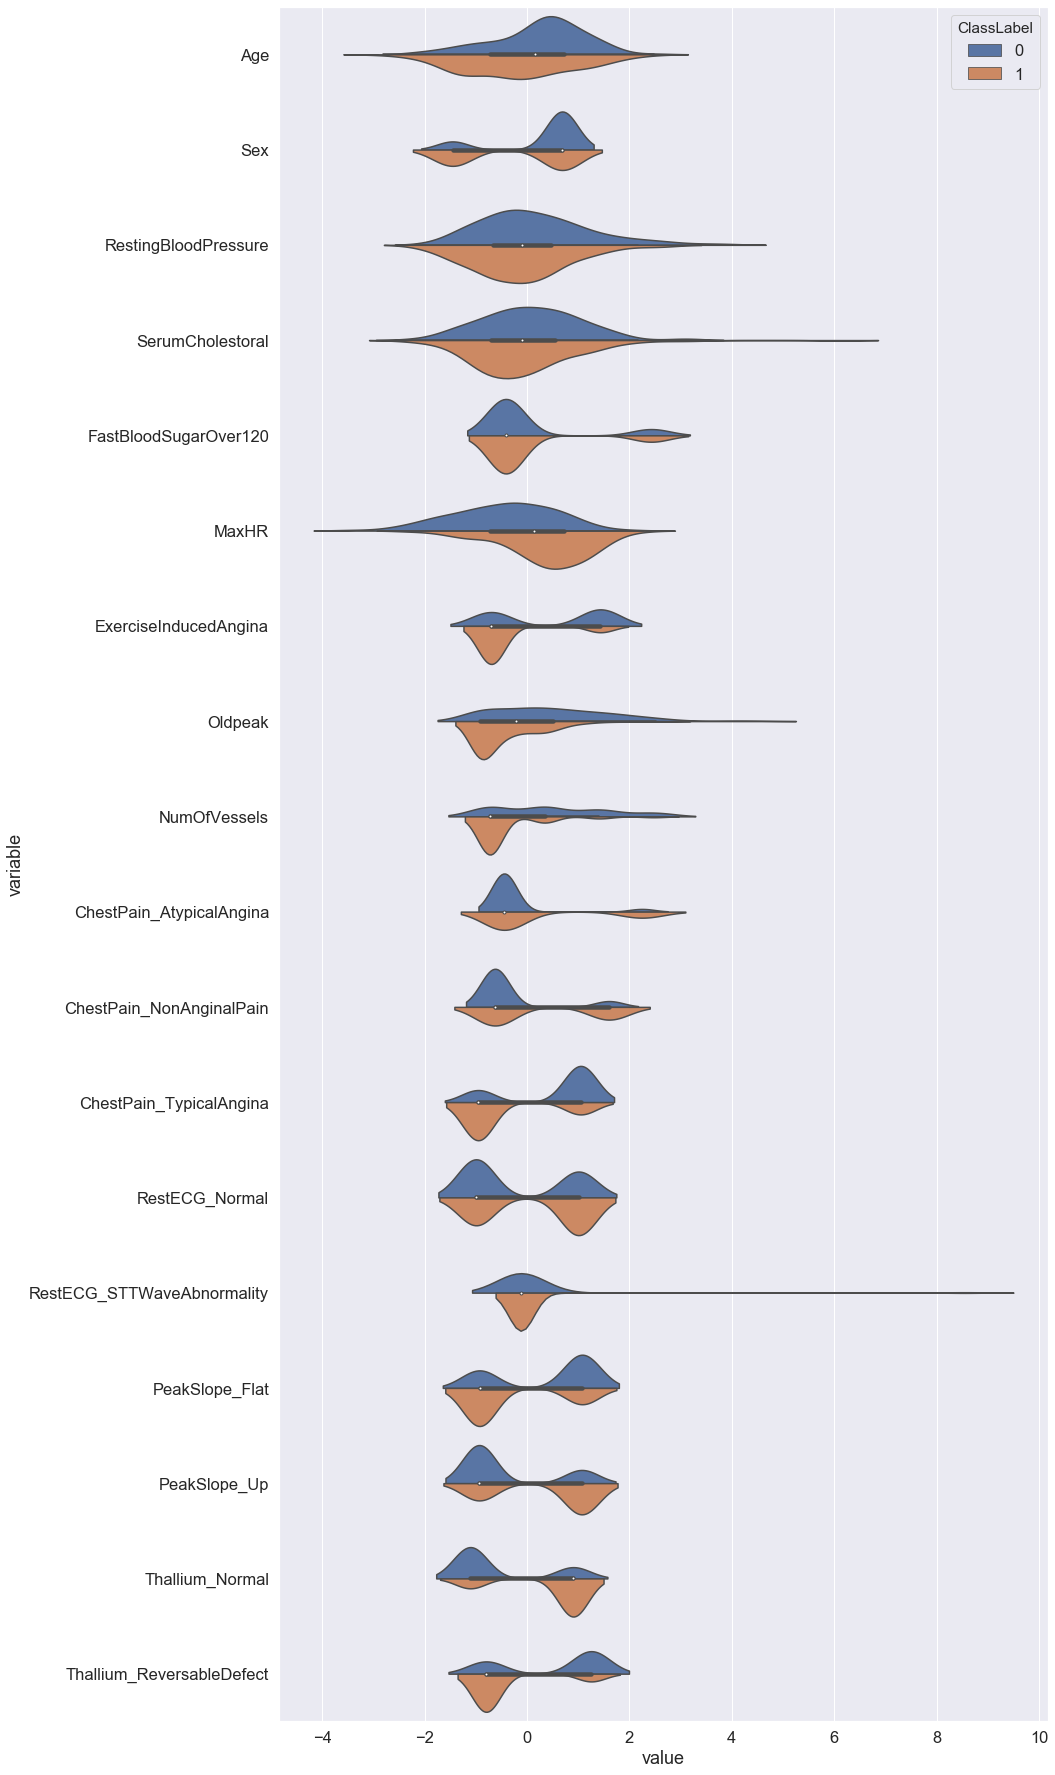

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

X = df.loc[:,df.columns != 'ClassLabel']
y = df['ClassLabel']

X_temp = StandardScaler().fit_transform(X)
temp = pd.DataFrame(X_temp, columns = X.columns, index = X.index)
temp['ClassLabel'] = y
temp = pd.melt(temp,id_vars = 'ClassLabel')

fig = plt.figure(figsize = (15,25))
sn.set(font_scale = 1.5)
ax = sn.violinplot(x = 'value'
                  , y = 'variable'
                  , hue = 'ClassLabel'
                  , data = temp
                  , scale = 'area'
                  , split = True)
plt.tight_layout()
plt.show()

The above plot highlights some key differences between patients who have less than (Blue: ClassLabel 0) or greater than (orange: ClassLabel 1) 50% vessel diameter narrowing, such as diseased patients (ClassLabel 0) tend to be older males with slightly higher serum cholesterol and a lower maximum heart rate compared to the disease-free patients (ClassLabel 1). Now lets compare the features to determine if any colinearities exist

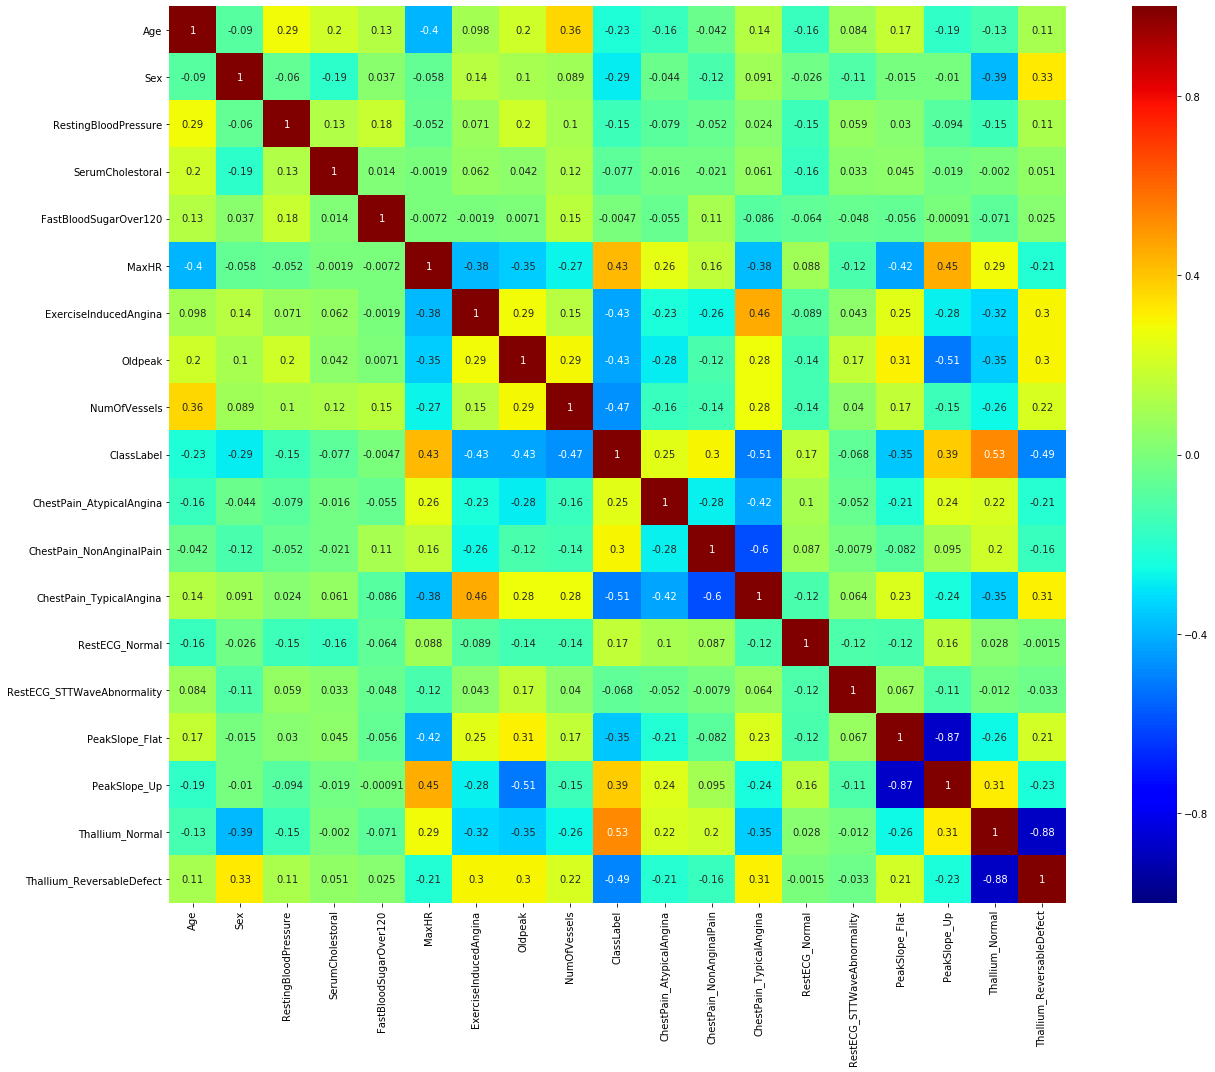

In [9]:
from matplotlib.pyplot import cm
corr = df.corr()
figure(figsize=(20,15))
sn.heatmap(corr, vmin=-1, vmax=1, center=0,cmap = cm.jet,square = True,annot = True)
plt.tight_layout()
plt.show()

From this we can see that the majority of the features are uncorrelated, or at most weakly correlated (<0.5 and >-0.5). The only stongly correlated features (>=0.6 or <=-0.6) are the features that we one-hot encoded. 

## __Machine learning__

Before we begin, we must first split the data into training and testing datasets. Let's reserve 20% of the data for testing. Most machine learning algorithms require data to be on the same scale, thus lets scale the data now as well. Note: We scale the testing data using the mean and standard deviation of the training data, just as we would for any new data we received.

We will use nested-cross validation in order to systematically tune our models and predict how they will perform on new, unseen, data[$^{10}$](https://onlinelibrary.wiley.com/doi/abs/10.1002/cem.1225). We will then use the accuracy score of each model of the training and validation datasets to compare differnt models.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

Accuracy_metric = 'accuracy'
outer_cv = 5
inner_cv = 2

For each model that we look at we will examine the effects of reducing the number of features through feature selection and dimensionality reduction to see how simplifying our model in this way reduces the accuracy whilst speeding up the algorithms run time. We will do this in 3 ways:
1. Using a subset of features, as determined by feature importance of a random forest[$^{11}$](https://ieeexplore.ieee.org/abstract/document/6137279)
2. Principal componant analysis, a unsupervised method for dimensionality reduction[$^{12}$](https://www.sciencedirect.com/science/article/pii/0169743987800849)
3. Linear discriminant analysis, a supervised method for dimensionality reduction[$^{13}$](http://www.music.mcgill.ca/~ich/classes/mumt611_07/classifiers/lda_theory.pdf)

### __1. Random Forest__[$^{14}$](http://cogns.northwestern.edu/cbmg/LiawAndWiener2002.pdf)

#### Full Random Forest model

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import time


forest_full = make_pipeline(StandardScaler(),RandomForestClassifier())
param_grid = [{'randomforestclassifier__n_estimators' : [100,200,300,400,500]
              ,'randomforestclassifier__max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,None]
              ,'randomforestclassifier__bootstrap':[True,False]
              ,'randomforestclassifier__class_weight':['balanced','none']}]
gs_forest = GridSearchCV(estimator = forest_full
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_forest = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_forest:
    gs = gs_forest.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Full Random Forest accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Full Random Forest accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
forest_train_full = train_score
forest_validation_full = validation_score

gs_forest = GridSearchCV(estimator = forest_full
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Full Random Forest, once fitted with all of the training data, are:\n '
      ,gs_forest.fit(X_train,y_train).best_params_)
forest_optimum_full = gs_forest.best_estimator_

start = time.time()
forest_optimum_full.predict(X_train)
forest_full_time = time.time()-start
print('Full Random Forest took: %.f seconds to run' % forest_full_time)

Tuned Full Random Forest accuracy for training data = 0.969 +/- 0.047
Tuned Full Random Forest accuracy for validation data = 0.856 +/- 0.034
The best set of parameters for a Full Random Forest, once fitted with all of the training data, are:
  {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 500}
Full Random Forest took: 0 seconds to run


##### Finding the feature importances

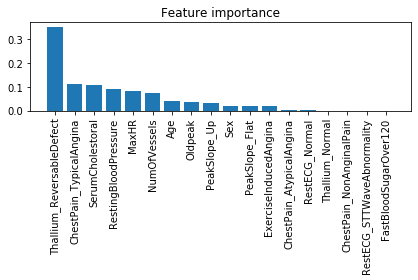

In [12]:
forest_optimum_full.fit(X_train,y_train)
feature_importance = forest_optimum_full[1][1].feature_importances_
indices = np.argsort(feature_importance)[::-1]
plt.title('Feature importance')
plt.bar(range(X.shape[1]),feature_importance[indices], align = 'center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90)
plt.tight_layout()
plt.show()

Let's use the set of features with a cumulative sum of feature importance of at least 0.9

In [13]:
from sklearn.feature_selection import SelectFromModel
N_feat = np.sum([1 for ii in np.cumsum(feature_importance[indices]) if ii<0.9])+1
sfm = SelectFromModel(forest_optimum_full[1][1], max_features = N_feat,prefit=True)
for ii in range(N_feat):
    print('Feature: %-25s, Importance: %.2f' % (X.columns[indices[ii]],feature_importance[indices[ii]]))
print('\nTotal feature importance: %.2f'%np.cumsum(feature_importance[indices])[N_feat-1])

Feature: Thallium_ReversableDefect, Importance: 0.35
Feature: ChestPain_TypicalAngina  , Importance: 0.11
Feature: SerumCholestoral         , Importance: 0.11
Feature: RestingBloodPressure     , Importance: 0.09
Feature: MaxHR                    , Importance: 0.08
Feature: NumOfVessels             , Importance: 0.07
Feature: Age                      , Importance: 0.04
Feature: Oldpeak                  , Importance: 0.04
Feature: PeakSlope_Up             , Importance: 0.03

Total feature importance: 0.93


#### Reduced-feature Random Forest model

In [14]:
from sklearn.preprocessing import FunctionTransformer

def trans(X):
    return X.iloc[:,sfm.get_support(indices = True)]

forest_reduced = make_pipeline(FunctionTransformer(trans),StandardScaler(),RandomForestClassifier())
param_grid = [{'randomforestclassifier__n_estimators' : [100,200,300,400,500]
              ,'randomforestclassifier__max_depth' : np.arange(1,N_feat+1,1).tolist() + [None]
              ,'randomforestclassifier__bootstrap':[True,False]
              ,'randomforestclassifier__class_weight':['balanced','none']}]
gs_forest = GridSearchCV(estimator = forest_reduced
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)

cv_grid_forest = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_forest:
    gs = gs_forest.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))

print('Tuned Reduced Random Forest accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Reduced Random Forest accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
forest_train_reduced = train_score
forest_validation_reduced = validation_score

gs_forest = GridSearchCV(estimator = forest_reduced
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Reduced Random Forest, once fitted with all of the training data, are:\n '
      ,gs_forest.fit(X_train,y_train).best_params_)
forest_optimum_reduced = gs_forest.best_estimator_

start = time.time()
forest_optimum_reduced.predict(X_train)
forest_reduced_time = time.time() - start
print('Reduced Random Forest took: %.2f seconds to run' % forest_reduced_time)

Tuned Reduced Random Forest accuracy for training data = 0.860 +/- 0.022
Tuned Reduced Random Forest accuracy for validation data = 0.822 +/- 0.059
The best set of parameters for a Reduced Random Forest, once fitted with all of the training data, are:
  {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 1, 'randomforestclassifier__n_estimators': 400}
Reduced Random Forest took: 0.03 seconds to run


##### Principal component analysis (PCA)
First look at the explained variance of each principal component analysis to decide how to reduce the dimensionality

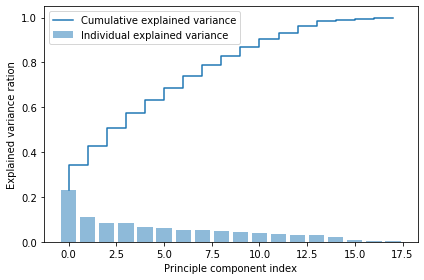

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit(StandardScaler().fit_transform(X_train))
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(X.shape[1]), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(X.shape[1]), cum_var_exp, label = 'Cumulative explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principle component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

With the exeption of the first principal component, each of them individually explain very little of the variance, thus we will take the set of principal components which explain at least 90% of the variance

In [16]:
N_pca = np.sum([1 for ii in cum_var_exp if ii<0.9])+1
print('%d principal components explain at least 90%% of the variance of the training data'%N_pca)

12 principal components explain at least 90% of the variance of the training data


#### Principal component Random Forest model

In [17]:
forest_pca = make_pipeline(StandardScaler(),PCA(n_components = N_pca),RandomForestClassifier())
param_grid = [{'randomforestclassifier__n_estimators' : [100,200,300,400,500]
              ,'randomforestclassifier__max_depth' : np.arange(1,N_pca+1,1).tolist() + [None]
              ,'randomforestclassifier__bootstrap':[True,False]
              ,'randomforestclassifier__class_weight':['balanced','none']}]
gs_forest = GridSearchCV(estimator = forest_pca
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_forest = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []

for (train,val) in cv_grid_forest:
    gs = gs_forest.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned PCA Random Forest accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned PCA Random Forest accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
forest_train_pca = train_score
forest_validation_pca = validation_score

gs_forest = GridSearchCV(estimator = forest_pca
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a PCA Random Forest, once fitted with all of the training data, are:\n '
      ,gs_forest.fit(X_train,y_train).best_params_)
forest_optimum_pca = gs_forest.best_estimator_

start = time.time()
forest_optimum_pca.predict(X_train)
forest_pca_time = time.time()-start
print('PCA Random Forest took: %.2f seconds to run' % forest_pca_time)

Tuned PCA Random Forest accuracy for training data = 0.879 +/- 0.035
Tuned PCA Random Forest accuracy for validation data = 0.818 +/- 0.053
The best set of parameters for a PCA Random Forest, once fitted with all of the training data, are:
  {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 200}
PCA Random Forest took: 0.02 seconds to run


##### Linear Discriminant Analysis (LDA)
For LDA, the number of linear discriminants it returns is at most 1 less than the number of classes. Thus, as we only have 2 classes here (diseased or not diseased), LDA will only return a single linear discriminant.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train_lda = lda.fit_transform(StandardScaler().fit_transform(X_train),y_train)
print('Number of linear discriminants returned: %d'%X_train_lda.shape[1])

Number of linear discriminants returned: 1


#### Linear Discriminant Random Forest model

In [19]:
forest_lda = make_pipeline(StandardScaler(),LDA(),RandomForestClassifier())
param_grid = [{'randomforestclassifier__n_estimators' : [100,200,300,400,500]
              ,'randomforestclassifier__max_depth' : np.arange(1,2,1).tolist() + [None]
              ,'randomforestclassifier__bootstrap':[True,False]
              ,'randomforestclassifier__class_weight':['balanced','none']}]
gs_forest = GridSearchCV(estimator = forest_lda
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_forest = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_forest:
    gs = gs_forest.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned LDA Random Forest accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned LDA Random Forest accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
forest_train_lda = train_score
forest_validation_lda = validation_score

gs_forest = GridSearchCV(estimator = forest_lda
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a LDA Random Forest, once fitted with all of the training data, are:\n '
      ,gs_forest.fit(X_train,y_train).best_params_)
forest_optimum_lda = gs_forest.best_estimator_

start = time.time()
forest_optimum_lda.predict(X_train)
forest_lda_time = time.time()-start
print('LDA Random Forest took: %.2f seconds to run' % forest_lda_time)

Tuned LDA Random Forest accuracy for training data = 0.881 +/- 0.013
Tuned LDA Random Forest accuracy for validation data = 0.826 +/- 0.061
The best set of parameters for a LDA Random Forest, once fitted with all of the training data, are:
  {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 1, 'randomforestclassifier__n_estimators': 100}
LDA Random Forest took: 0.02 seconds to run


### __2. Perceptron__[$^{15}$](https://ieeexplore.ieee.org/document/80230)

#### Full Perceptron model

In [20]:
from sklearn.linear_model import Perceptron

per_full = make_pipeline(StandardScaler(),Perceptron())
param_grid = [{'perceptron__penalty' : ['l2','l1','none']
              ,'perceptron__alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
              ,'perceptron__eta0' : [0.0001, 0.001, 0.01, 0.1, 1.0]
              ,'perceptron__max_iter':[10000]
              ,'perceptron__class_weight':['balanced','none']}]
gs_per = GridSearchCV(estimator = per_full
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_per = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_per:
    gs = gs_per.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Full Perceptron accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Full Perceptron accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
per_train_full = train_score
per_validation_full = validation_score

gs_per = GridSearchCV(estimator = per_full
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Full Perceptron, once fitted with all of the training data, are:\n '
      ,gs_per.fit(X_train,y_train).best_params_)
per_optimum_full = gs_per.best_estimator_

start = time.time()
per_optimum_full.predict(X_train)
perceptron_full_time = time.time()-start
print('Full Perceptron took: %.2f seconds to run' % perceptron_full_time)

Tuned Full Perceptron accuracy for training data = 0.798 +/- 0.054
Tuned Full Perceptron accuracy for validation data = 0.763 +/- 0.042
The best set of parameters for a Full Perceptron, once fitted with all of the training data, are:
  {'perceptron__alpha': 0.001, 'perceptron__class_weight': 'balanced', 'perceptron__eta0': 1.0, 'perceptron__max_iter': 10000, 'perceptron__penalty': 'l1'}
Full Perceptron took: 0.00 seconds to run


#### Reduced-feature Perceptron model

In [21]:
per_reduced = make_pipeline(FunctionTransformer(trans),StandardScaler(),Perceptron())
gs_per = GridSearchCV(estimator = per_reduced
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_per = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_per:
    gs = gs_per.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Reduced Perceptron accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Reduced Perceptron accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
per_train_reduced = train_score
per_validation_reduced = validation_score

gs_per = GridSearchCV(estimator = per_reduced
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Reduced Perceptron, once fitted with all of the training data, are:\n '
      ,gs_per.fit(X_train,y_train).best_params_)
per_optimum_reduced = gs_per.best_estimator_

start = time.time()
per_optimum_reduced.predict(X_train)
perceptron_reduced_time = time.time()-start
print('Reduced Perceptron took: %.2f seconds to run' % perceptron_reduced_time)

Tuned Reduced Perceptron accuracy for training data = 0.778 +/- 0.071
Tuned Reduced Perceptron accuracy for validation data = 0.809 +/- 0.041
The best set of parameters for a Reduced Perceptron, once fitted with all of the training data, are:
  {'perceptron__alpha': 0.0001, 'perceptron__class_weight': 'balanced', 'perceptron__eta0': 1.0, 'perceptron__max_iter': 10000, 'perceptron__penalty': 'none'}
Reduced Perceptron took: 0.00 seconds to run


#### Principal component Perceptron model

In [22]:
per_pca = make_pipeline(StandardScaler(),PCA(n_components = N_pca),Perceptron())
gs_per = GridSearchCV(estimator = per_pca
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_per = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_per:
    gs = gs_per.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned PCA Perceptron accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned PCA Perceptron accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
per_train_pca = train_score
per_validation_pca = validation_score

gs_per = GridSearchCV(estimator = per_pca
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a PCA Perceptron, once fitted with all of the training data, are:\n '
      ,gs_per.fit(X_train,y_train).best_params_)
per_optimum_pca = gs_per.best_estimator_

start = time.time()
per_optimum_pca.predict(X_train)
perceptron_pca_time = time.time()-start
print('PCA Perceptron took: %.2f seconds to run' % perceptron_pca_time)

Tuned PCA Perceptron accuracy for training data = 0.711 +/- 0.137
Tuned PCA Perceptron accuracy for validation data = 0.678 +/- 0.114
The best set of parameters for a PCA Perceptron, once fitted with all of the training data, are:
  {'perceptron__alpha': 10.0, 'perceptron__class_weight': 'balanced', 'perceptron__eta0': 0.001, 'perceptron__max_iter': 10000, 'perceptron__penalty': 'l2'}
PCA Perceptron took: 0.02 seconds to run


#### Linear Discriminant Perceptron model

In [23]:
per_lda = make_pipeline(StandardScaler(),LDA(),Perceptron())
gs_per = GridSearchCV(estimator = per_lda
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_per = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_per:
    gs = gs_per.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned LDA Perceptron accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned LDA Perceptron accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
per_train_lda = train_score
per_validation_lda = validation_score

gs_per = GridSearchCV(estimator = per_lda
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a LDA Perceptron, once fitted with all of the training data, are:\n '
      ,gs_per.fit(X_train,y_train).best_params_)
per_optimum_lda = gs_per.best_estimator_

start = time.time()
per_optimum_lda.predict(X_train)
perceptron_lda_time = time.time()-start
print('LDA Perceptron took: %.2f seconds to run' % perceptron_lda_time)

Tuned LDA Perceptron accuracy for training data = 0.850 +/- 0.016
Tuned LDA Perceptron accuracy for validation data = 0.826 +/- 0.053
The best set of parameters for a LDA Perceptron, once fitted with all of the training data, are:
  {'perceptron__alpha': 0.0001, 'perceptron__class_weight': 'balanced', 'perceptron__eta0': 0.1, 'perceptron__max_iter': 10000, 'perceptron__penalty': 'l2'}
LDA Perceptron took: 0.00 seconds to run


### 3. Logistic Regression[$^{16}$](https://link.springer.com/book/10.1007%2F978-1-4419-1742-3)

#### Full Logistic Regression model

In [24]:
from sklearn.linear_model import LogisticRegression

lr_full = make_pipeline(StandardScaler(),LogisticRegression())

param_grid = [{'logisticregression__penalty' : ['l2']
              ,'logisticregression__C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
              ,'logisticregression__solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
              ,'logisticregression__max_iter':[10000]
              ,'logisticregression__class_weight':['balanced','none']},
             {'logisticregression__penalty' : ['l1']
              ,'logisticregression__C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
              ,'logisticregression__solver' : ['liblinear','sag','saga']
              ,'logisticregression__max_iter':[10000]
              ,'logisticregression__class_weight':['balanced','none']},
             {'logisticregression__penalty' : ['none']
              ,'logisticregression__max_iter':[10000]
              ,'logisticregression__class_weight':['balanced','none']}]
gs_lr = GridSearchCV(estimator = lr_full
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_lr = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_lr:
    gs = gs_lr.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Full Logistic Regression accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Full Logistic Regression accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
lr_train_full = train_score
lr_validation_full = validation_score

gs_lr = GridSearchCV(estimator = lr_full
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Full Logistic Regression, once fitted with all of the training data, are:\n '
      ,gs_lr.fit(X_train,y_train).best_params_)
lr_optimum_full = gs_lr.best_estimator_

start = time.time()
lr_optimum_full.predict(X_train)
lr_full_time = time.time()-start
print('Full Logistic Regression took: %.2f seconds to run' % lr_full_time)

Tuned Full Logistic Regression accuracy for training data = 0.850 +/- 0.028
Tuned Full Logistic Regression accuracy for validation data = 0.805 +/- 0.058
The best set of parameters for a Full Logistic Regression, once fitted with all of the training data, are:
  {'logisticregression__C': 0.1, 'logisticregression__class_weight': 'none', 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Full Logistic Regression took: 0.00 seconds to run


#### Reduced Feature Logistic Regression model

In [25]:
lr_reduced = make_pipeline(FunctionTransformer(trans),StandardScaler(),LogisticRegression())
gs_lr = GridSearchCV(estimator = lr_reduced
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_lr = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_lr:
    gs = gs_lr.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Reduced Logistic Regression accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Reduced Logistic Regression accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
lr_train_reduced = train_score
lr_validation_reduced = validation_score

gs_lr = GridSearchCV(estimator = lr_reduced
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Reduced Logistic Regression, once fitted with all of the training data, are:\n '
      ,gs_lr.fit(X_train,y_train).best_params_)
lr_optimum_reduced = gs_lr.best_estimator_

start = time.time()
lr_optimum_reduced.predict(X_train)
lr_reduced_time = time.time()-start
print('Reduced Logistic Regression took: %.2f seconds to run' % lr_reduced_time)

Tuned Reduced Logistic Regression accuracy for training data = 0.864 +/- 0.014
Tuned Reduced Logistic Regression accuracy for validation data = 0.813 +/- 0.058
The best set of parameters for a Reduced Logistic Regression, once fitted with all of the training data, are:
  {'logisticregression__C': 0.01, 'logisticregression__class_weight': 'none', 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Reduced Logistic Regression took: 0.00 seconds to run


#### Principal Componant Logistic Regression model

In [26]:
lr_pca = make_pipeline(StandardScaler(),PCA(n_components = N_pca),LogisticRegression())
gs_lr = GridSearchCV(estimator = lr_pca
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_lr = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_lr:
    gs = gs_lr.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned PCA Logistic Regression accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned PCA Logistic Regression accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
lr_train_pca = train_score
lr_validation_pca = validation_score

gs_lr = GridSearchCV(estimator = lr_pca
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a PCA Logistic Regression, once fitted with all of the training data, are:\n '
      ,gs_lr.fit(X_train,y_train).best_params_)
lr_optimum_pca = gs_lr.best_estimator_

start = time.time()
lr_optimum_pca.predict(X_train)
lr_pca_time = time.time()-start
print('PCA Logistic Regression took: %.2f seconds to run' % lr_pca_time)

Tuned PCA Logistic Regression accuracy for training data = 0.833 +/- 0.010
Tuned PCA Logistic Regression accuracy for validation data = 0.814 +/- 0.024
The best set of parameters for a PCA Logistic Regression, once fitted with all of the training data, are:
  {'logisticregression__C': 0.0001, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
PCA Logistic Regression took: 0.00 seconds to run


#### Linear Discriminant Logistic Regression model

In [27]:
lr_lda = make_pipeline(StandardScaler(),LDA(),LogisticRegression())
gs_lr = GridSearchCV(estimator = lr_lda
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_lr = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_lr:
    gs = gs_lr.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned LDA Logistic Regression accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned LDA Logistic Regression accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
lr_train_lda = train_score
lr_validation_lda = validation_score

gs_lr = GridSearchCV(estimator = lr_lda
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a LDA Logistic Regression, once fitted with all of the training data, are:\n '
      ,gs_lr.fit(X_train,y_train).best_params_)
lr_optimum_lda = gs_lr.best_estimator_

start = time.time()
lr_optimum_lda.predict(X_train)
lr_lda_time = time.time()-start
print('LDA Logistic Regression took: %.2f seconds to run' % lr_lda_time)

Tuned LDA Logistic Regression accuracy for training data = 0.874 +/- 0.013
Tuned LDA Logistic Regression accuracy for validation data = 0.822 +/- 0.057
The best set of parameters for a LDA Logistic Regression, once fitted with all of the training data, are:
  {'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
LDA Logistic Regression took: 0.00 seconds to run


### 4. DecisionTree[$^{17}$](https://ieeexplore.ieee.org/abstract/document/97458)

#### Full Decision Tree model

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_full = make_pipeline(StandardScaler(),DecisionTreeClassifier())
param_grid = [{'decisiontreeclassifier__criterion' : ['entropy','gini']
              ,'decisiontreeclassifier__max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,None]
              ,'decisiontreeclassifier__class_weight' : ['balanced',None]}]
gs_tree = GridSearchCV(estimator = tree_full
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_tree = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_tree:
    gs = gs_tree.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Full Decision Tree accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Full Decision Tree accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
tree_train_full = train_score
tree_validation_full = validation_score

gs_tree = GridSearchCV(estimator = tree_full
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for Full Decision tree, once fitted with all of the training data, are:\n '
      ,gs_tree.fit(X_train,y_train).best_params_)
tree_optimum_full = gs_tree.best_estimator_

start = time.time()
tree_optimum_full.predict(X_train)
tree_full_time = time.time()-start
print('Full Decision Tree took: %.2f seconds to run' % tree_full_time)

Tuned Full Decision Tree accuracy for training data = 0.953 +/- 0.057
Tuned Full Decision Tree accuracy for validation data = 0.797 +/- 0.053
The best set of parameters for Full Decision tree, once fitted with all of the training data, are:
  {'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3}
Full Decision Tree took: 0.00 seconds to run


#### Reduced-Feature Decision Tree model

In [29]:
tree_reduced = make_pipeline(FunctionTransformer(trans),StandardScaler(),DecisionTreeClassifier())
param_grid = [{'decisiontreeclassifier__criterion' : ['entropy','gini']
              ,'decisiontreeclassifier__max_depth' : np.arange(1,N_feat+1,1).tolist() + [None]
              ,'decisiontreeclassifier__class_weight' : ['balanced',None]}]
gs_tree = GridSearchCV(estimator = tree_reduced
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_tree = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_tree:
    gs = gs_tree.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Reduced Decision Tree accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Reduced Decision Tree accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
tree_train_reduced = train_score
tree_validation_reduced = validation_score

gs_tree = GridSearchCV(estimator = tree_reduced
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for Reduced Decision tree, once fitted with all of the training data, are:\n '
      ,gs_tree.fit(X_train,y_train).best_params_)
tree_optimum_reduced = gs_tree.best_estimator_

start = time.time()
tree_optimum_reduced.predict(X_train)
tree_reduced_time = time.time()-start
print('Reduced Decision Tree took: %.2f seconds to run' % tree_reduced_time)

Tuned Reduced Decision Tree accuracy for training data = 0.869 +/- 0.006
Tuned Reduced Decision Tree accuracy for validation data = 0.830 +/- 0.023
The best set of parameters for Reduced Decision tree, once fitted with all of the training data, are:
  {'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4}
Reduced Decision Tree took: 0.00 seconds to run


#### Principal Component Decision Tree

In [30]:
tree_pca = make_pipeline(StandardScaler(),PCA(n_components=N_pca),DecisionTreeClassifier())
param_grid = [{'decisiontreeclassifier__criterion' : ['entropy','gini']
              ,'decisiontreeclassifier__max_depth' : np.arange(1,N_pca+1,1).tolist() + [None]
              ,'decisiontreeclassifier__class_weight' : ['balanced',None]}]
gs_tree = GridSearchCV(estimator = tree_pca
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_tree = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_tree:
    gs = gs_tree.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned PCA Decision Tree accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned PCA Decision Tree accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
tree_train_pca = train_score
tree_validation_pca = validation_score

gs_tree = GridSearchCV(estimator = tree_pca
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for PCA Decision tree, once fitted with all of the training data, are:\n '
      ,gs_tree.fit(X_train,y_train).best_params_)
tree_optimum_pca = gs_tree.best_estimator_

start = time.time()
tree_optimum_pca.predict(X_train)
tree_pca_time = time.time()-start
print('PCA Decision Tree took: %.2f seconds to run' % tree_pca_time)

Tuned PCA Decision Tree accuracy for training data = 0.821 +/- 0.008
Tuned PCA Decision Tree accuracy for validation data = 0.779 +/- 0.049
The best set of parameters for PCA Decision tree, once fitted with all of the training data, are:
  {'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2}
PCA Decision Tree took: 0.00 seconds to run


#### Linear Discriminant Decision Tree

In [31]:
tree_lda = make_pipeline(StandardScaler(),LDA(),DecisionTreeClassifier())
param_grid = [{'decisiontreeclassifier__criterion' : ['entropy','gini']
              ,'decisiontreeclassifier__max_depth' : np.arange(1,2,1).tolist() + [None]
              ,'decisiontreeclassifier__class_weight' : ['balanced',None]}]
gs_tree = GridSearchCV(estimator = tree_pca
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_tree = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_tree:
    gs = gs_tree.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned LDA Decision Tree accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned LDA Decision Tree accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
tree_train_lda = train_score
tree_validation_lda = validation_score

gs_tree = GridSearchCV(estimator = tree_lda
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for LDA Decision tree, once fitted with all of the training data, are:\n '
      ,gs_tree.fit(X_train,y_train).best_params_)
tree_optimum_lda = gs_tree.best_estimator_

start = time.time()
tree_optimum_lda.predict(X_train)
tree_lda_time = time.time()-start
print('LDA Decision Tree took: %.2f seconds to run' % tree_lda_time)

Tuned LDA Decision Tree accuracy for training data = 0.806 +/- 0.024
Tuned LDA Decision Tree accuracy for validation data = 0.759 +/- 0.073
The best set of parameters for LDA Decision tree, once fitted with all of the training data, are:
  {'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 1}
LDA Decision Tree took: 0.00 seconds to run


### 5. K-Nearest Neighbors[$^{18}$](https://link.springer.com/chapter/10.1007/BFb0033288)

#### Full K-Nearest Neighbors model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_full = make_pipeline(StandardScaler(),KNeighborsClassifier())
param_grid = [{'kneighborsclassifier__n_neighbors':np.arange(1,20,2).tolist()
               ,'kneighborsclassifier__weights':['uniform','distance']}]
gs_knn = GridSearchCV(estimator = knn_full
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_knn = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_knn:
    gs = gs_knn.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Full K-Nearest Neighbors accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Full K-Nearest Neighbors accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
knn_train_full = train_score
knn_validation_full = validation_score

gs_knn = GridSearchCV(estimator = knn_full
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Full K-Nearest Neighbors, once fitted with all of the training data, are:\n '
      ,gs_knn.fit(X_train,y_train).best_params_)
knn_optimum_full = gs_knn.best_estimator_

start = time.time()
knn_optimum_full.predict(X_train)
knn_full_time = time.time()-start
print('Full K-Nearest Neighbors took: %.2f seconds to run' % knn_full_time)

Tuned Full K-Nearest Neighbors accuracy for training data = 0.905 +/- 0.078
Tuned Full K-Nearest Neighbors accuracy for validation data = 0.839 +/- 0.056
The best set of parameters for a Full K-Nearest Neighbors, once fitted with all of the training data, are:
  {'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'uniform'}
Full K-Nearest Neighbors took: 0.02 seconds to run


#### Reduced-Feature K-Nearest Neighbors

In [33]:
knn_reduced = make_pipeline(FunctionTransformer(trans),StandardScaler(),KNeighborsClassifier())
gs_knn = GridSearchCV(estimator = knn_reduced
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_knn = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_knn:
    gs = gs_knn.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Reduced K-Nearest Neighbors accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Reduced K-Nearest Neighbors accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
knn_train_reduced = train_score
knn_validation_reduced = validation_score

gs_knn = GridSearchCV(estimator = knn_reduced
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a Reduced K-Nearest Neighbors, once fitted with all of the training data, are:\n '
      ,gs_knn.fit(X_train,y_train).best_params_)
knn_optimum_reduced = gs_knn.best_estimator_

start = time.time()
knn_optimum_reduced.predict(X_train)
knn_reduced_time = time.time()-start
print('Reduced K-Nearest Neighbors took: %.2f seconds to run' % knn_reduced_time)

Tuned Reduced K-Nearest Neighbors accuracy for training data = 0.910 +/- 0.075
Tuned Reduced K-Nearest Neighbors accuracy for validation data = 0.835 +/- 0.028
The best set of parameters for a Reduced K-Nearest Neighbors, once fitted with all of the training data, are:
  {'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'uniform'}
Reduced K-Nearest Neighbors took: 0.02 seconds to run


#### Principal Componant K-Nearest Neighbors

In [34]:
knn_pca = make_pipeline(StandardScaler(),PCA(n_components = N_pca),KNeighborsClassifier())
gs_knn = GridSearchCV(estimator = knn_pca
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_knn = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_knn:
    gs = gs_knn.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned PCA K-Nearest Neighbors accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned PCA K-Nearest Neighbors accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
knn_train_pca = train_score
knn_validation_pca = validation_score

gs_knn = GridSearchCV(estimator = knn_pca
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a PCA K-Nearest Neighbors, once fitted with all of the training data, are:\n '
      ,gs_knn.fit(X_train,y_train).best_params_)
knn_optimum_pca = gs_knn.best_estimator_

start = time.time()
knn_optimum_pca.predict(X_train)
knn_pca_time = time.time()-start
print('PCA K-Nearest Neighbors took: %.2f seconds to run' % knn_pca_time)

Tuned PCA K-Nearest Neighbors accuracy for training data = 0.873 +/- 0.065
Tuned PCA K-Nearest Neighbors accuracy for validation data = 0.835 +/- 0.044
The best set of parameters for a PCA K-Nearest Neighbors, once fitted with all of the training data, are:
  {'kneighborsclassifier__n_neighbors': 17, 'kneighborsclassifier__weights': 'uniform'}
PCA K-Nearest Neighbors took: 0.00 seconds to run


#### Linear Discriminant K-Nearest Neighbors

In [35]:
knn_lda = make_pipeline(StandardScaler(),LDA(),KNeighborsClassifier())
gs_knn = GridSearchCV(estimator = knn_lda
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_knn = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_knn:
    gs = gs_knn.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned LDA K-Nearest Neighbors accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned LDA K-Nearest Neighbors accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
knn_train_lda = train_score
knn_validation_lda = validation_score

gs_knn = GridSearchCV(estimator = knn_lda
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for a LDA K-Nearest Neighbors, once fitted with all of the training data, are:\n '
      ,gs_knn.fit(X_train,y_train).best_params_)
knn_optimum_lda = gs_knn.best_estimator_

start = time.time()
knn_optimum_lda.predict(X_train)
knn_lda_time = time.time()-start
print('LDA K-Nearest Neighbors took: %.2f seconds to run' % knn_lda_time)

Tuned LDA K-Nearest Neighbors accuracy for training data = 0.891 +/- 0.021
Tuned LDA K-Nearest Neighbors accuracy for validation data = 0.847 +/- 0.044
The best set of parameters for a LDA K-Nearest Neighbors, once fitted with all of the training data, are:
  {'kneighborsclassifier__n_neighbors': 19, 'kneighborsclassifier__weights': 'uniform'}
LDA K-Nearest Neighbors took: 0.00 seconds to run


### 6. Support Vector Machine[$^{19}$](https://www.nature.com/articles/nbt1206-1565)

#### Full Support Vector model

In [36]:
from sklearn.svm import SVC

svc_full = make_pipeline(StandardScaler(),SVC())
param_grid = [{'svc__C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
              ,'svc__kernel' : ['linear']
              ,'svc__class_weight':['balanced','none']
              ,'svc__max_iter':[10000]},
             {'svc__C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
              ,'svc__kernel' : ['rbf','poly','sigmoid']
              ,'svc__gamma':['scale','auto',0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
              ,'svc__class_weight':['balanced','none']
              ,'svc__max_iter':[10000]}]
gs_svc = GridSearchCV(estimator = svc_full
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_svc = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_svc:
    gs = gs_svc.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Full Support vector accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Full Support vector accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
svc_train_full = train_score
svc_validation_full = validation_score

gs_svc = GridSearchCV(estimator = svc_full
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for Full Support vector, once fitted with all of the training data, are:\n '
      ,gs_svc.fit(X_train,y_train).best_params_)
svc_optimum_full = gs_svc.best_estimator_

start = time.time()
svc_optimum_full.predict(X_train)
svc_full_time = time.time()-start
print('Full Support vector took: %.2f seconds to run' % svc_full_time)

Tuned Full Support vector accuracy for training data = 0.899 +/- 0.056
Tuned Full Support vector accuracy for validation data = 0.792 +/- 0.050
The best set of parameters for Full Support vector, once fitted with all of the training data, are:
  {'svc__C': 1.0, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 10000}
Full Support vector took: 0.00 seconds to run


#### Reduced-Feature Support Vector model

In [37]:
svc_reduced = make_pipeline(FunctionTransformer(trans),StandardScaler(),SVC())
gs_svc = GridSearchCV(estimator = svc_reduced
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_svc = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_svc:
    gs = gs_svc.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned Reduced Support vector accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned Reduced Support vector accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
svc_train_reduced = train_score
svc_validation_reduced = validation_score

gs_svc = GridSearchCV(estimator = svc_reduced
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for Reduced Support vector, once fitted with all of the training data, are:\n '
      ,gs_svc.fit(X_train,y_train).best_params_)
svc_optimum_reduced = gs_svc.best_estimator_

start = time.time()
svc_optimum_reduced.predict(X_train)
svc_reduced_time = time.time()-start
print('Reduced Support vector took: %.2f seconds to run' % svc_reduced_time)

C:\Users\Jamie\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Tuned Reduced Support vector accuracy for training data = 0.850 +/- 0.015
Tuned Reduced Support vector accuracy for validation data = 0.843 +/- 0.028
The best set of parameters for Reduced Support vector, once fitted with all of the training data, are:
  {'svc__C': 0.01, 'svc__class_weight': 'balanced', 'svc__gamma': 1.0, 'svc__kernel': 'sigmoid', 'svc__max_iter': 10000}
Reduced Support vector took: 0.00 seconds to run


#### Principal Component Support Vector model

In [38]:
svc_pca = make_pipeline(StandardScaler(),PCA(n_components=N_pca),SVC())
gs_svc = GridSearchCV(estimator = svc_pca
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_svc = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_svc:
    gs = gs_svc.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned PCA Support vector accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned PCA Support vector accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
svc_train_pca = train_score
svc_validation_pca = validation_score

gs_svc = GridSearchCV(estimator = svc_pca
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for PCA Support vector, once fitted with all of the training data, are:\n '
      ,gs_svc.fit(X_train,y_train).best_params_)
svc_optimum_pca = gs_svc.best_estimator_

start = time.time()
svc_optimum_pca.predict(X_train)
svc_pca_time = time.time()-start
print('PCA Support vector took: %.2f seconds to run' % svc_pca_time)

Tuned PCA Support vector accuracy for training data = 0.873 +/- 0.049
Tuned PCA Support vector accuracy for validation data = 0.780 +/- 0.044
The best set of parameters for PCA Support vector, once fitted with all of the training data, are:
  {'svc__C': 1.0, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 10000}
PCA Support vector took: 0.00 seconds to run


#### Linear Discriminant Support Vector model

In [39]:
svc_lda = make_pipeline(StandardScaler(),LDA(),SVC())
gs_svc = GridSearchCV(estimator = svc_lda
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_grid_svc = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_grid_svc:
    gs = gs_svc.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Tuned LDA Support vector accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Tuned LDA Support vector accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
svc_train_lda = train_score
svc_validation_lda = validation_score

gs_svc = GridSearchCV(estimator = svc_lda
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
print('The best set of parameters for LDA Support vector, once fitted with all of the training data, are:\n '
      ,gs_svc.fit(X_train,y_train).best_params_)
svc_optimum_lda = gs_svc.best_estimator_

start = time.time()
svc_optimum_lda.predict(X_train)
svc_lda_time = time.time()-start
print('LDA Support vector took: %.2f seconds to run' % svc_lda_time)

Tuned LDA Support vector accuracy for training data = 0.843 +/- 0.038
Tuned LDA Support vector accuracy for validation data = 0.797 +/- 0.068
The best set of parameters for LDA Support vector, once fitted with all of the training data, are:
  {'svc__C': 0.01, 'svc__class_weight': 'balanced', 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 10000}
LDA Support vector took: 0.02 seconds to run


### 7. Majority voting of all previously examined algorithms[$^{20}$](http://www.cs.man.ac.uk/~gbrown/research/brown10ensemblelearning.pdf)

We will now combine all of the previous classification algorithms by implementing a majority vote of each classifiers predictions. Due to computational complexity (over 280 billion different possible combinations!), we will have to restrict the combinations that are looked at in such a way to reduce this computational cost. Therefore we will only look at combinations consisting of exactly 1 classification algorithm (random forest, perceptron, etc.). This limits the number of possible combinations to 4096, which is far more manageable. 

In [69]:
from sklearn.ensemble import VotingClassifier

L = [[0, 0, 0, 1],[0, 0, 1, 0],[0, 1, 0, 0],[1, 0, 0, 0]]
weights = []
x = len(L)
for i1 in range(x):
    for i2 in range(x):
        for i3 in range(x):
            for i4 in range(x): 
                for i5 in range(x):
                    for i6 in range(x):
                        weights.append(L[i1]+L[i2]+L[i3]+L[i4]+L[i5]+L[i6])
weights = weights[1:]
for ii in range(len(weights)):
    s = np.sum(weights[ii])
    weights[ii] = [i/s for i in weights[ii]]
    
param_grid = [{'weights' : weights}]

gs_MV = GridSearchCV(estimator = VotingClassifier(estimators = [('PerceptronFull',per_full)
                                         ,('PerceptronReduced',per_reduced)
                                         ,('PerceptronPCA',per_pca)
                                         ,('PerceptronLDA',per_lda)
                                         ,('LogisticRegressionFull',lr_full)
                                         ,('LogisticRegressionReduced',lr_reduced)
                                         ,('LogisticRegressionPCA',lr_pca)
                                         ,('LogisticRegressionLDA',lr_lda)
                                         ,('DecisionTreeFull',tree_full)
                                         ,('DecisionTreeReduced',tree_reduced)
                                         ,('DecisionTreePCA',tree_pca)
                                         ,('DecisionTreeLDA',tree_lda)
                                         ,('KNearestNeighborsFull',knn_full)
                                         ,('KNearestNeighborsReduced',knn_reduced)
                                         ,('KNearestNeighborsPCA',knn_pca)
                                         ,('KNearestNeighborsLDA',knn_lda)
                                         ,('SupportVectorFull',svc_full)
                                         ,('SupportVectorReduced',svc_reduced)
                                         ,('SupportVectorPCA',svc_pca)
                                         ,('SupportVectorLDA',svc_lda)
                                         ,('RandomForestFull',forest_full)
                                         ,('RandomForestReduced',forest_reduced)
                                         ,('RandomForestPCA',forest_pca)
                                         ,('RandomForestLDA',forest_lda)])
                 ,param_grid = param_grid
                 ,cv = inner_cv
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric)
cv_MV = list(StratifiedKFold(n_splits = outer_cv, shuffle = True).split(X_train,y_train))
train_score = []
validation_score = []
for (train,val) in cv_MV:
    gs = gs_MV.fit(X_train.iloc[train,:],y_train.ravel()[train])
    train_score.append(gs.score(X_train.iloc[train,:],y_train.ravel()[train]))
    validation_score.append(gs.score(X_train.iloc[val,:],y_train.ravel()[val]))
print('Majority vote model ensemble accuracy for training data = %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('Majority vote model ensemble accuracy for validation data = %.3f +/- %.3f' % (np.mean(validation_score),np.std(validation_score)))
MV_train = train_score
MV_validation = validation_score

gs_MV = GridSearchCV(estimator = VotingClassifier(estimators = [('PerceptronFull',per_full)
                                         ,('PerceptronReduced',per_reduced)
                                         ,('PerceptronPCA',per_pca)
                                         ,('PerceptronLDA',per_lda)
                                         ,('LogisticRegressionFull',lr_full)
                                         ,('LogisticRegressionReduced',lr_reduced)
                                         ,('LogisticRegressionPCA',lr_pca)
                                         ,('LogisticRegressionLDA',lr_lda)
                                         ,('DecisionTreeFull',tree_full)
                                         ,('DecisionTreeReduced',tree_reduced)
                                         ,('DecisionTreePCA',tree_pca)
                                         ,('DecisionTreeLDA',tree_lda)
                                         ,('KNearestNeighborsFull',knn_full)
                                         ,('KNearestNeighborsReduced',knn_reduced)
                                         ,('KNearestNeighborsPCA',knn_pca)
                                         ,('KNearestNeighborsLDA',knn_lda)
                                         ,('SupportVectorFull',svc_full)
                                         ,('SupportVectorReduced',svc_reduced)
                                         ,('SupportVectorPCA',svc_pca)
                                         ,('SupportVectorLDA',svc_lda)
                                         ,('RandomForestFull',forest_full)
                                         ,('RandomForestReduced',forest_reduced)
                                         ,('RandomForestPCA',forest_pca)
                                         ,('RandomForestLDA',forest_lda)])
                 ,param_grid = param_grid
                 ,cv = 10
                 ,n_jobs = -1
                 ,scoring = Accuracy_metric
                 ,verbose=1)
print('The best weights for Majority vote, once fitted with all of the training data, are:\n '
      ,gs_MV.fit(X_train,y_train).best_params_)
MV_optimum = gs_MV.best_estimator_

start = time.time()
MV_optimum.predict(X_train)
MV_time = time.time()-start
print('Majority vote took: %.2f seconds to run' % MV_time)

Majority vote model ensemble accuracy for training data = 0.934 +/- 0.017
Majority vote model ensemble accuracy for validation data = 0.822 +/- 0.052
The best weights for Majority vote, once fitted with all of the training data, are:
  {'weights': [0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0]}
Majority vote took: 0.12 seconds to run


So the optimum combination consisted of:
1. Reduced-feature Perceptron
2. LDA Logistic Regression
3. Full Decision Tree
4. LDA K-NearestNeighbors
5. Reduced-feature Support Vector
6. Full Random Forest

Lastly, lets compare all of the models we have explored so far

In [73]:
model_name = ['Random Forest'
              ,'Perceptron'
              ,'Logistic Regression'
              ,'Decision Tree'
              ,'K-Nearest Neighbors'
              ,'Support vector'
              ,'Majority vote']
train_scores = [(forest_train_full,forest_train_reduced,forest_train_pca,forest_train_lda)
                ,(per_train_full,per_train_reduced,per_train_pca,per_train_lda)
                ,(lr_train_full,lr_train_reduced,lr_train_pca,lr_train_lda)
                ,(tree_train_full,tree_train_reduced,tree_train_pca,tree_train_lda)
                ,(knn_train_full,knn_train_reduced,knn_train_pca,knn_train_lda)
                ,(svc_train_full,svc_train_reduced,svc_train_pca,svc_train_lda)
                ,(MV_train)]
validation_scores = [(forest_validation_full,forest_validation_reduced,forest_validation_pca,forest_validation_lda)
                    ,(per_validation_full,per_validation_reduced,per_validation_pca,per_validation_lda)
                    ,(lr_validation_full,lr_validation_reduced,lr_validation_pca,lr_validation_lda)
                    ,(tree_validation_full,tree_validation_reduced,tree_validation_pca,tree_validation_lda)
                    ,(knn_validation_full,knn_validation_reduced,knn_validation_pca,knn_validation_lda)
                    ,(svc_validation_full,svc_validation_reduced,svc_validation_pca,svc_validation_lda)
                    ,(MV_validation)]
times = [(forest_full_time,forest_reduced_time,forest_pca_time,forest_lda_time)
        ,(perceptron_full_time,perceptron_reduced_time,perceptron_pca_time,perceptron_lda_time)
        ,(lr_full_time,lr_reduced_time,lr_pca_time,lr_lda_time)
        ,(tree_full_time,tree_reduced_time,tree_pca_time,tree_lda_time)
        ,(knn_full_time,knn_reduced_time,knn_pca_time,knn_lda_time)
        ,(svc_full_time,svc_reduced_time,svc_pca_time,svc_lda_time)
        ,(MV_time)]
fitted = ['Full','Reduced','PCA','LDA']
for alg, tr, v, times in zip(model_name, train_scores, validation_scores, times):
    print('\n \033[1m %s\n \033[0m'%alg)
    if alg == 'Majority vote':
        print('%16s training accuracy = \033[1m%.3f +/- %0.3f\033[0m, validation accuracy = \033[1m %.3f +/- %0.3f\033[0m, and fitting time \033[1m%.2f\033[0ms' 
                 % ('',np.mean(tr),np.std(tr),np.mean(v),np.std(v),times))   
    else:
        for ii in range(len(tr)):
            print('%10s model training accuracy = \033[1m%.3f +/- %0.3f\033[0m, validation accuracy = \033[1m %.3f +/- %0.3f\033[0m, and fitting time \033[1m%.3f\033[0ms' 
                 % (fitted[ii], np.mean(tr[ii]),np.std(tr[ii]),np.mean(v[ii]),np.std(v[ii]),times[ii]))   



  Random Forest
 
      Full model training accuracy = 0.969 +/- 0.047, validation accuracy =  0.856 +/- 0.034, and fitting time 0.031s
   Reduced model training accuracy = 0.860 +/- 0.022, validation accuracy =  0.822 +/- 0.059, and fitting time 0.031s
       PCA model training accuracy = 0.879 +/- 0.035, validation accuracy =  0.818 +/- 0.053, and fitting time 0.016s
       LDA model training accuracy = 0.881 +/- 0.013, validation accuracy =  0.826 +/- 0.061, and fitting time 0.016s

  Perceptron
 
      Full model training accuracy = 0.798 +/- 0.054, validation accuracy =  0.763 +/- 0.042, and fitting time 0.000s
   Reduced model training accuracy = 0.778 +/- 0.071, validation accuracy =  0.809 +/- 0.041, and fitting time 0.000s
       PCA model training accuracy = 0.711 +/- 0.137, validation accuracy =  0.678 +/- 0.114, and fitting time 0.016s
       LDA model training accuracy = 0.850 +/- 0.016, validation accuracy =  0.826 +/- 0.053, and fitting time 0.000s

  Logistic Regressio

#### Random Forest
The full random forest classifier was the best overall performer on the training dataset, however, it performed signiicantly worse on the validation dataset, a clear sign of overfitting. Similarly, though not to the same degree, all other random forest models appear to be victims of overfitting, with the best at generalising to the validation dataset being the reduced-feature model. Though the full random forest was clearly overfitting the data, it was still the best random forest model on the validation dataset.
#### Perceptron
The Perceptron, overall, was the worst performing algorithm, though this is to be expected with its simplicity. The LDA perceptron model was by far the best performing on the training dataset, generalised reasonably well to the validation dataset.
#### Logistic Regression 
All logistic regression models perfomed well on the training dataset and were reasonably good at generalising to the validation data, with only moderate signs of overfitting. However, the best overall model was the PCA model, which generalised to the validation dataset well, with the least amount of variation in its performance, making it the most reliable logisitic regression model.
#### Decision Tree
Like for the full random forest model, the full decision trees was a clear victims to overfitting, leading to a much lower accuracy for the validation dataset. The reduced-feature decision tree model was the best performer on the validation dataset, with minimal variance.
#### K-Nearest Neighbors
The full K-nearest neighbors, the reduced-feature and to a lesser extent the PCA and LDA models did not perform as well on the validation dataset as they did for the training dataset. The LDA model achieved the highest accuracies on the validation dataset making it the best performing K-nearest neighbors model.
#### Support vector
The full, PCA and LDA support vector models again did not generalise well to the validation dataset. The reduced-feature model, however, generalised well and was therefore achieved the highest accuracy on the validation dataset, making it the best performing support vector model.
#### Majority voting
The majority voting algorithm performed exceptionally well on the training data, however, was poor at generalising to the validation dataset with over a 10% decrease in accuracy.

Thus, comparing these models we can conclude that the reduced-feature support vector was the best overall performer on the training and validation datasets, due to its exceptional generalisation and high accuracies. We would, therefore, expect this model to perfom best in a real-world scenario. 

As the testing data set should not be used to for model selection we shall only use the best performing model on the training and validation dataset to fit onto the testing data to assess final model performance.

In [76]:
alg = 'Reduced-feature Support Vector'
clf = svc_reduced
clf.fit(X_train,y_train)
if 'Full' in alg:
    ii = 1
else:
    ii = 2
print('%25s training accuracy score = \033[1m%.3f\033[0m, testing accuracy score = \033[1m%.3f\033[0m' % (alg, clf.score(X_train,y_train),clf.score(X_test,y_test)))

Reduced-feature Support Vector training accuracy score = 0.881, testing accuracy score = 0.833


As we can see, the accuracy of this model on the testing data is within the accuracy range seen on the validation dataset. Therfore, we can expect this model to perform well in a real world senario with accuracies close to 84.5%. Lastly, lets train this model using all available data so that it is ready for real-world use.

In [78]:
clf.fit(X,y)
print('%25s overall training accuracy score = \033[1m%.3f\033[0m' % (alg, clf.score(X_train,y_train)))

Reduced-feature Support Vector overall training accuracy score = 0.873


### Discussion and future work

In this notebook I have explored a dataset containing information on 13 different characteristics of patients with/without heart disease. I then explored the data to find any distinct features between diseased and non-diseased patients and explored any correlations between the patients information. Six different machine learning classification algorithms were examined for their ability to predict if a patient has heart disease. These were a random forest, a perceptron, logistic regression, a single decision tree, K-nearest neighbors, and a support vector machine. Each of these algorithms were tested using the full set of features; a reduced set of only the most important features; and subsets of transformed features using principal component analysis or linear discriminant analysis. Each of these features were then combined by a majority vote ensemble to find which combination was most successful in predicting heart disease. Overall, the best performing algorithm was the reduced-feature support vector algorithm, which was demonstrated to be capable of accuracies close to 84.5% using only 9 patient characteristics:
1. Reversable thallium defect
2. Typical angina chest pain
3. Serum cholestoral levels
4. Resting blood pressure
5. Maximum achievable heart rate
6. Number of major vessels coloured by flourosopy
7. Age
8. ST depression induced by exercise relative to rest
9. Upsloping peak exercise ST segment

There are several possible avenues of future work to creating a model with further increased accuracy than the one found here. Other models, such as a naive bayes classification algorithm, could be examined for their performance with the data. Also, alternative ensemble methods could be examined to combine the models, such as AdaBoost, which may lead to increased performance. Although, here the number of combinations examined in the majority voting ensemble was reduced due to computational complexity, further combinations such as groupings of two or three classifiers may outperform the overall combination. Therefore, it is of interest to explore this hyperparameter space further. While the distribution of the classes (diseased/non-diseased) in the dataset examined here is fairly evenly spread, with 136 diseased and 160 non-diseased cases, it may increase model performance if the diseased cases were either upsampled, or synthetic cases were generated by a method such as SMOTE[$^{21}$](https://link.springer.com/chapter/10.1007/11538059_91), which would enable more data for the models to learn from. It would also be worth investigating whether a different scoring metrics, such as F1-score, sensetivity, specificity or area under a receiver-oporator curve would lead to improved performance.